<a href="https://colab.research.google.com/github/RitreshGirdhar/RoBERTa-tokenization/blob/master/Copy_of_roberta_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install libraries

In [ ]:
!pip install tensorflow
!pip install transformers
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorf

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00


#Import libraries

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import logging
import tensorflow as tf
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import random
from tqdm import tqdm
from math import ceil
import numpy as np
from pathlib import Path
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Dataset

Gather a large corpus of product's text data that represents the grocery retail or ecommerce products/sku's we want the RoBERTa model to be proficient in classify and identify similarity. This corpus will be used to train the tokenizer.

**Define Constants**

In [ ]:
special_tokens = ["<name>","<brand>","<category>"]
SPECIAL_TOKEN_LEFT_BRACKET = "<"
SPECIAL_TOKEN_RIGHT_BRACKET = ">"

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/data1.txt"

In [ ]:
# Load your dataset (adjust the file path accordingly)
data = pd.read_csv(DATA_PATH, sep = '\t')
print("Loading dataset....")

Loading dataset....


**Print sample data**

In [ ]:
data.head()

,text
0,<name> Allegiance Economy Dual-scale Digital T...
1,<name> Kenneth Cole Reaction Eau De Parfum Spr...
2,<name> Kid Tough Fitness Inflatable Free-Stand...
3,<name> THE FIRST YEARS <brand> The First Years...
4,<name> 4 Pack - MD USA Seamless Toe-Wave-In Me...


# Tokenizer

* A tokenizer is a fundamental component of natural language processing (NLP) that splits text into smaller units known as tokens.
* These tokens can be words, punctuation marks, numbers, or any other elements considered atomic for further processing.
* Tokenization is a critical step in various NLP tasks, such as text classification, language translation, and question answering.

Tokenizer is composed of three main components:

1.   Normalizer
2.   Pre-Tokenizer
3.   Tokenizer



**Normalization involves tasks such as:**

* **Lowercasing**: Converting all characters to lowercase to ensure case-insensitive processing.
* Removing or replacing special characters, punctuation, and diacritics.
Handling Unicode characters and accents.
* Expanding contractions (e.g., "don't" to "do not").
* **Removing excess white spaces** and leading/trailing spaces.

**Pre-Tokenizer:**
* This component performs an initial splitting of the input text into smaller segments, such as individual words, subwords, or characters.
* The pre-tokenizer can split the text based on various criteria, such as white space, digits, and punctuation marks.
* The goal of the pre-tokenizer is to reduce the input text into smaller segments that can be further processed by the tokenizer.

**Tokenizer:**
* This component takes the preprocessed and pre-tokenized dataset and further transforms it into tokens.
* This involves converting the input text into numerical IDs that can be fed into a machine learning model for training or inference.
* The tokenizer can use various algorithms, such as the BPE tokenizer, to generate the subword vocabulary.



---


#Tokenizer Training Starts

* Training a tokenizer for the RoBERTa model involves creating a vocabulary and encoding the text data into numerical tokens that the model can understand.

* Tokenizers are essential for converting raw text into a format suitable for training deep learning models like RoBERTa.


There are several methods for tokenization, including:
* **Word-level tokenization** - which is intuitive and splits the vocabulary by white space and punctuation. This approach can result in large vocabulary size and difficulties with handling OOV (out-of-vocabulary) tokens.
* **Character-level tokenization**, - which has a smaller vocabulary size but can make it harder for the model to learn the meaning of individual characters in context.
* **Subword tokenization** - which decomposes words into frequent subwords. For example, high-frequency words like "I", "are", and "like" would be considered as a whole, while a rare word like "likely" would be split into "like" and "ly". This method generates a reasonable vocabulary size and can handle OOV tokens, making it easier to learn meaningful context-independent representations.

In [ ]:
from tokenizers import ByteLevelBPETokenizer
from transformers import RobertaTokenizer

In [ ]:
special_tokens_replacements = {
        token.replace(
            SPECIAL_TOKEN_LEFT_BRACKET, f"{SPECIAL_TOKEN_LEFT_BRACKET} "
        ).replace(
            SPECIAL_TOKEN_RIGHT_BRACKET, f" {SPECIAL_TOKEN_RIGHT_BRACKET}"
        ): token
        for token in special_tokens
    }


**Preprocess Data**

Preprocess the dataset with a normalizer that performs unicode normalization, removes accented characters, and lowercases all text.

In [ ]:
from tokenizers import normalizers, pre_tokenizers
from tokenizers.normalizers import NFD, Lowercase, StripAccents
from tokenizers.pre_tokenizers import Digits, Punctuation, Whitespace

In [ ]:
def preprocess(text, special_tokens_replacements):
    normalizer = normalizers.Sequence([NFD(), StripAccents(), Lowercase()])

    pre_tokenizer = pre_tokenizers.Sequence(
        [
            Digits(individual_digits=True),
            Whitespace(),
            Punctuation(behavior="isolated"),
        ]
    )

    normalized_doc = normalizer.normalize_str(text)

    pre_tokenized_doc = pre_tokenizer.pre_tokenize_str(normalized_doc)

    pre_tokenized_doc = " ".join([t[0].strip() for t in pre_tokenized_doc])

    for split_token, token in special_tokens_replacements.items():
        pre_tokenized_doc = pre_tokenized_doc.replace(split_token, token)

    return pre_tokenized_doc

In [ ]:
data['text'] = data['text'].apply(
        preprocess,
        special_tokens_replacements=special_tokens_replacements,
)

**After pre-tokenizer:**

In [ ]:
data['text'][0]

'<name> allegiance economy dual - scale digital thermometer <brand> cardinal health <category> health | medicine cabinet | thermometers | digital thermometers'

**Save Processed Corpus**

In [ ]:
CORPUS_PATH="/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/"
CORPUS_FILES_NAME="item_feature_text_{}.csv"
SEED = 8292
corpus_truncation_size=1000

In [ ]:
def split_corpus(dataset, corpus_path, corpus_truncation_size, header):
    random.seed(SEED)
    dataset.sample(frac=1).reset_index(drop=True)

    # Path(corpus_path).mkdir(exist_ok=False)
    num_of_chunks = ceil(len(dataset) / corpus_truncation_size)
    for idx, chunk in tqdm(enumerate(np.array_split(dataset, num_of_chunks))):
        chunk.to_csv(
            Path(corpus_path) / CORPUS_FILES_NAME.format(idx),
            index=False,
            header=header
        )

In [ ]:
split_corpus(
        data['text'],
        corpus_path=CORPUS_PATH,
        corpus_truncation_size=corpus_truncation_size,
        header=True)

30it [00:15,  1.91it/s]


In [ ]:
corpus_files_path = [str(x) for x in Path(CORPUS_PATH).glob("*.csv")]

In [ ]:
corpus_files_path

['/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_0.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_1.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_2.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_5.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_3.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_4.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_6.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_8.csv',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/corpus/item_feature_text_

In [ ]:
all_data = []  # List to hold DataFrames
for file_path in corpus_files_path:
    df = pd.read_csv(file_path)  # Read CSV file
    all_data.append(df)  # Append DataFrame to the list
combined_df = pd.concat(all_data, ignore_index=True)

#Initializing the tokenizer.

In [ ]:
feature_tokenizer = ByteLevelBPETokenizer()
feature_tokenizer

Tokenizer(vocabulary_size=0, model=ByteLevelBPE, add_prefix_space=False, lowercase=False, dropout=None, unicode_normalizer=None, continuing_subword_prefix=None, end_of_word_suffix=None, trim_offsets=False)

**What is ByteLevelBPETokenizer?**




**Byte-Pair Encoding (BPE):** BPE is a subword tokenization technique that splits words into smaller subword units based on their frequency of occurrence in the training data. It is particularly useful for handling out-of-vocabulary words and morphologically rich languages. BPE breaks words into subword units (subtokens) instead of complete words.

**Byte-Level:** Traditional tokenizers often work at the character level or word level. The byte-level aspect of ByteLevelBPETokenizer involves considering the text at the byte level, which allows the tokenizer to handle a wider range of characters and symbols in different languages.

In [ ]:
tokenizer_vocab_size=50000
TOKENIZER_DEFAULT_SPECIAL_TOKENS = ["<s>", "</s>", "<unk>", "<pad>", "<mask>"]
tokenizer_min_frequency=10

tokenizer_sequence_length = 128
tokenizer_padding = "max_length"
tokenizer_truncation = True

In [ ]:
feature_tokenizer.train(
        files=corpus_files_path,
        vocab_size=tokenizer_vocab_size,
        min_frequency=tokenizer_min_frequency,
        special_tokens=TOKENIZER_DEFAULT_SPECIAL_TOKENS + special_tokens
)

In [ ]:
feature_tokenizer

Tokenizer(vocabulary_size=10152, model=ByteLevelBPE, add_prefix_space=False, lowercase=False, dropout=None, unicode_normalizer=None, continuing_subword_prefix=None, end_of_word_suffix=None, trim_offsets=False)

**Original text:**
<name> 10 Cup Everyday Water Pitcher with 1 Filter, BPA Free, White <brand> Brita <category> Non-Food > GM > Home & Entertainment > Home & Ent. > Home > Household >
Water Coolers/Filtration > Water Filtration/Water Coolers > Systems > Pour Through

**After normalizer:**
<name> 10 cup everyday water pitcher with 1 filter, bpa free, white <brand> brita <category> non-food > gm > home & entertainment > home & ent. > home > household >
water coolers/filtration > water filtration/water coolers > systems > pour through

**After pre-tokenizer:**
<name> 1 0 cup everyday water pitcher with 1 filter , bpa free , white <brand> brita <category> non - food > gm > home & entertainment > home & ent . > home >
household > water coolers / filtration > water filtration / water coolers > systems > pour through

**Save tokenizer**

In [ ]:
TOKENIZER_PATH = "/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/"

In [ ]:
feature_tokenizer.save_model(TOKENIZER_PATH)

['/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/vocab.json',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/merges.txt']

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained(
        TOKENIZER_PATH,
        model_max_length=tokenizer_sequence_length,
        padding=tokenizer_padding,
        truncation=tokenizer_truncation
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
train_encoding = roberta_tokenizer(combined_df['text'].tolist(), padding=tokenizer_padding, truncation=tokenizer_truncation, return_tensors="tf")

In [ ]:
roberta_tokenizer

RobertaTokenizer(name_or_path='/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/', vocab_size=10152, model_max_length=128, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>', 'additional_special_tokens': ['<s>', '</s>', '<unk>', '<pad>', '<mask>', '<name>', '<brand>', '<category>']}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<mask>", rst

In [ ]:
roberta_tokenizer.add_special_tokens(
        {"additional_special_tokens": special_tokens}
)
print("Tokenizer Vocab Size:",roberta_tokenizer.vocab_size)
print("Special Tokens:",roberta_tokenizer.all_special_tokens)
print("Special Token IDs:", roberta_tokenizer.all_special_ids)
print("Max Sequence Length:", roberta_tokenizer.model_max_length)
print("Saving RoBERTa Tokenizer locally.")

Tokenizer Vocab Size: 10152
Special Tokens: ['<s>', '</s>', '<unk>', '<pad>', '<mask>', '<name>', '<brand>', '<category>']
Special Token IDs: [0, 1, 2, 3, 4, 5, 6, 7]
Max Sequence Length: 128
Saving RoBERTa Tokenizer locally.


**Saving RoBERTa Tokenizer locally...**

In [ ]:
roberta_tokenizer.save_pretrained(TOKENIZER_PATH)

('/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/vocab.json',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/merges.txt',
 '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/added_tokens.json')

In [ ]:
roberta_tokenizer

RobertaTokenizer(name_or_path='/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/', vocab_size=10152, model_max_length=128, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>', 'additional_special_tokens': ['<s>', '</s>', '<unk>', '<pad>', '<mask>', '<name>', '<brand>', '<category>']}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<mask>", rst

#Tokenizer Training Ends here


---



# RoBERTa training

In [ ]:
df = pd.read_csv(corpus_files_path[10])
df['text'][0]

'<name> bakol foods bakol jel dessert , 3 oz <brand> bakol <category> food | snacks , cookies & chips | pudding & gelatin'

In [ ]:
EXTENSION = "csv"

In [ ]:
print("Loading RoBERTa tokenizer.")

Loading RoBERTa tokenizer.


In [ ]:
raw_datasets = load_dataset(EXTENSION, data_files=corpus_files_path)

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 30000
    })
})

In [ ]:
DATA_SET = "dataset"
TRAIN_SET = "train"
VALID_SET = "validation"
tokenization_num_process=4
SPECIAL_TOKENS_MASK_KEY = "special_tokens_mask"
INPUT_IDS_KEY = "input_ids"

In [ ]:
data_files = {DATA_SET: f"{DATA_PATH}"}

In [ ]:
data_files

{'dataset': '/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/data1.txt'}

In [ ]:
print("Splitting train/valid set.")
raw_datasets[VALID_SET] = load_dataset(
        EXTENSION,
        data_files=corpus_files_path,
        column_names=['text'],
        split=f"{TRAIN_SET}[:{20}%]",
        skiprows=1
    )

Splitting train/valid set.


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 6000
    })
})

Tokenizing training & validation dataset.

In [ ]:
def tokenize_function(examples, text_column_name, tokenizer, padding, truncation):
    examples[text_column_name] = [
        line
        for line in examples[text_column_name]
        if len(line) > 0 and not line.isspace()
    ]

    tokenized_dict = tokenizer(
        examples[text_column_name],
        padding=padding,
        truncation=truncation,
        max_length=tokenizer.model_max_length,
        return_special_tokens_mask=False,
    )
    tokenized_dict[SPECIAL_TOKENS_MASK_KEY] = []
    for input_ids in tokenized_dict[INPUT_IDS_KEY]:
        tokenized_dict[SPECIAL_TOKENS_MASK_KEY].append(
            tokenizer.get_special_tokens_mask(
                input_ids, already_has_special_tokens=True
            )
        )

    return tokenized_dict

In [ ]:
tokenized_datasets = raw_datasets.map(
        tokenize_function,
        batched=True,
        num_proc=tokenization_num_process,
        load_from_cache_file=False,
        desc="Running tokenizer on dataset line_by_line",
        fn_kwargs={
            "text_column_name": 'text',
            "tokenizer": roberta_tokenizer,
            "padding": tokenizer_padding,
            "truncation": tokenizer_truncation,
        }
)

Running tokenizer on dataset line_by_line (num_proc=4):   0%|          | 0/30000 [00:00<?, ? examples/s]

Running tokenizer on dataset line_by_line (num_proc=4):   0%|          | 0/6000 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'input_ids', 'attention_mask', 'special_tokens_mask'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['text', 'input_ids', 'attention_mask', 'special_tokens_mask'],
        num_rows: 6000
    })
})



---



**Define custom MLM - Masked Langauge Model** (WIP)

*    The MLM training objective involves predicting the original tokens that were replaced by the mask tokens.
* **mlm_probability** - is the probability with which tokens in the input text are selected to be replaced by a special "mask" token during the Roberta-masked language model (MLM) training


In [ ]:
from transformers import DataCollatorForLanguageModeling
from typing import Any, Optional, Tuple

from transformers import (
    RobertaConfig,
    RobertaForMaskedLM,
    Trainer,
    TrainingArguments,
)

In [ ]:
mlm_probability=0.15

In [ ]:
class CustomizedDataCollatorForMLM(DataCollatorForLanguageModeling):
    def tensorflow_mask_tokens(
        self, inputs: tf.Tensor, special_tokens_mask: Optional[tf.Tensor] = None
    ) -> Tuple[tf.Tensor, tf.Tensor]:
        labels = tf.identity(inputs)
        probability_matrix = tf.fill(inputs.shape, self.mlm_probability)

        if special_tokens_mask is None:
            special_tokens_mask = tf.cast(
                tf.math.logical_not(tf.math.equal(inputs, 0)), dtype=tf.float32
            )
        else:
            special_tokens_mask = tf.cast(special_tokens_mask, dtype=tf.float32)

        probability_matrix = probability_matrix * special_tokens_mask
        masked_indices = tf.random.uniform(inputs.shape) < probability_matrix
        labels = tf.where(masked_indices, inputs, -100)

        masked_indices = tf.cast(masked_indices, dtype=tf.int32)
        masked_indices = tf.where(masked_indices)
        masked_indices = tf.stack([masked_indices[:, 0], masked_indices[:, 1]], axis=1)

        masked_token_ids = tf.cast(self.tokenizer.convert_tokens_to_ids(self.tokenizer.mask_token), dtype=tf.int32)
        inputs = tf.tensor_scatter_nd_update(inputs, masked_indices, masked_token_ids)
        return inputs, labels

In [ ]:
data_collator = CustomizedDataCollatorForMLM(
        tokenizer = roberta_tokenizer,
        mlm_probability = mlm_probability
    )

In [ ]:
data_collator

CustomizedDataCollatorForMLM(tokenizer=RobertaTokenizer(name_or_path='/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tokenizer/', vocab_size=10152, model_max_length=128, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>', 'additional_special_tokens': ['<s>', '</s>', '<unk>', '<pad>', '<mask>', '<name>', '<brand>', '<category>']}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, spec

**Note:** During each epoch, this data collator replaces randomly selected tokens with mask tokens dynamically, with the probability specified by the user. It's important to note that special tokens will not be replaced during this process.



---



**Define RoBERTa hyperparameters**

**What are the hyperparameters?**

Hyperparameters in the context of the Roberta model might include:

* Learning rate: A hyperparameter that controls how quickly the model adjusts its parameters based on the gradient during training.
* Batch size: The number of training examples used in each iteration of optimization.
* Number of layers: The number of layers in the Transformer architecture.
* Hidden layer size: The dimensionality of the hidden layers.
* Dropout rate: A regularization technique that prevents overfitting by randomly setting a fraction of the output units of a layer to zero during training.
* Number of attention heads: The number of parallel attention mechanisms in the self-attention layers.

In [ ]:
hidden_size=768
num_attention_heads=12
num_hidden_layers=12
intermediate_size=3072
type_vocab_size=1

In [ ]:
from transformers import TFRobertaForMaskedLM

In [ ]:
model = TFRobertaForMaskedLM(
     RobertaConfig(
                vocab_size=roberta_tokenizer.vocab_size,
                max_position_embeddings=roberta_tokenizer.model_max_length + 2,
                hidden_size=hidden_size,
                num_attention_heads=num_attention_heads,
                num_hidden_layers=num_hidden_layers,
                intermediate_size=intermediate_size,
                type_vocab_size=type_vocab_size,
            )
)

In [ ]:
model.build()

In [ ]:
model.summary()

Model: "tf_roberta_for_masked_lm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLaye  multiple                  92953344  
 r)                                                              
                                                                 
 lm_head (TFRobertaLMHead)   multiple                  8501160   
                                                                 
Total params: 93555624 (356.89 MB)
Trainable params: 93555624 (356.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Save model**

In [ ]:
MODEL_CHECKPOINT_DIR = "model_checkpoint/"
MODEL_DIR = "/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/trained_model/"
TRAINER_TUNING_OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/tuning_output/"
TRAINER_OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/training_output/"
FRAMEWORK = "tf"
num_train_epochs= 3
learning_rate=2e-5 # A smaller learning rate makes the model change its parameters more slowly, while a larger learning rate can lead to faster changes but might also make the training process less stable.
lr_scheduler_type="linear"
max_grad_norm=1.0
weight_decay=0.01
per_device_train_batch_size=32
per_device_eval_batch_size=64
evaluation_strategy="epoch"
save_strategy="epoch"
logging_strategy="steps"
save_total_limit=3
load_best_model_at_end=True

In [ ]:
# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Number of training epochs
num_train_epochs = 8

In [ ]:
@tf.function
def train_step(inputs):
    with tf.GradientTape() as tape:
        logits = model(inputs['input_ids'], training=True)
        loss = loss_fn(inputs['input_ids'], logits)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

@tf.function
def eval_step(inputs):
    logits = model(inputs['input_ids'], training=False)
    loss = loss_fn(inputs['input_ids'], logits)
    return logits, loss

In [ ]:
# # Define a batch size and number of epochs
batch_size = 8
num_epochs = 2

# # Define a TensorFlow Dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices(train_encoding)
train_dataset = train_dataset.batch(batch_size)


# Lists to store loss values for each epoch
losses = []

# # Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize epoch loss
    for batch in train_dataset:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']

        with tf.GradientTape() as tape:
            logits = model(input_ids, attention_mask=attention_mask, training=True)[0]
            loss = loss_fn(input_ids, logits)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        epoch_loss += loss.numpy()
        print(f"Epoch {epoch+1}, Batch loss: {loss.numpy():.4f}")
    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_dataset)
    losses.append(avg_epoch_loss)
    print(f"Epoch {epoch+1}, Batch loss: {loss.numpy():.4f}")

Epoch 1, Batch loss: 8.8440
Epoch 1, Batch loss: 6.5114
Epoch 1, Batch loss: 5.6972
Epoch 1, Batch loss: 4.2997
Epoch 1, Batch loss: 4.1899
Epoch 1, Batch loss: 3.4063
Epoch 1, Batch loss: 3.6001
Epoch 1, Batch loss: 3.1971
Epoch 1, Batch loss: 3.3981
Epoch 1, Batch loss: 3.4256
Epoch 1, Batch loss: 2.8480
Epoch 1, Batch loss: 2.7833
Epoch 1, Batch loss: 3.0644
Epoch 1, Batch loss: 2.8735
Epoch 1, Batch loss: 3.1295
Epoch 1, Batch loss: 2.6559
Epoch 1, Batch loss: 3.2409
Epoch 1, Batch loss: 2.6781
Epoch 1, Batch loss: 2.9322
Epoch 1, Batch loss: 3.2446
Epoch 1, Batch loss: 2.9415
Epoch 1, Batch loss: 2.8628
Epoch 1, Batch loss: 2.6362
Epoch 1, Batch loss: 2.3544
Epoch 1, Batch loss: 2.4370
Epoch 1, Batch loss: 2.7759
Epoch 1, Batch loss: 2.7890
Epoch 1, Batch loss: 2.4054
Epoch 1, Batch loss: 2.6264
Epoch 1, Batch loss: 2.6505
Epoch 1, Batch loss: 2.5672
Epoch 1, Batch loss: 2.5373
Epoch 1, Batch loss: 2.3279
Epoch 1, Batch loss: 2.4077
Epoch 1, Batch loss: 2.3785
Epoch 1, Batch loss:

KeyboardInterrupt: ignored

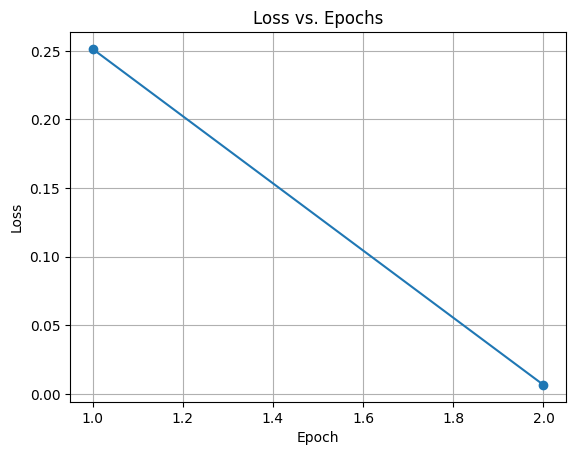

In [ ]:

# Plot the loss with respect to epochs
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.show()



---


**Upload trained model checkpoint**

In [ ]:
MODEL_DIR

'/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/text-classification/trained_model/'

In [ ]:
tf.keras.models.save_model(model, MODEL_DIR, save_format='tf')

# Validate RoBERTa Masking

In [ ]:
inputs = roberta_tokenizer("<name> Fresh avacado <brand>", return_tensors="tf")
logits = model(**inputs).logits

mask_token_index = tf.where((inputs.input_ids == roberta_tokenizer.mask_token_id)[0])
selected_logits = tf.gather_nd(logits[0], indices=mask_token_index)
predicted_token_id = tf.math.argmax(selected_logits, axis=-1)
roberta_tokenizer.decode(predicted_token_id)

''

#Model Tuning

 * Hyperparameter tuning or optimization, is a critical aspect of machine learning model development.
 * It involves systematically searching for the best set of hyperparameters for a given machine learning algorithm and dataset.
 * Hyperparameters are parameters that are set before training and affect the learning process itself.
 * They are not learned from the data like model parameters.

**Tuning Framework/Library** -- **Ray Tune**

Refer - https://www.ray.io/ray-tune

* Ray Tune is an open-source Python library, which focuses on distributed computing and reinforcement learning.
* Ray Tune is specifically designed for hyperparameter tuning and optimization.
* It provides a framework to help you efficiently explore and optimize the hyperparameter space of your machine learning models.

**Key Features - Ray tune**

**Distributed Execution:** Ray Tune leverages the Ray project's capabilities to enable distributed hyperparameter tuning. It can parallelize and distribute experiments across multiple CPUs or GPUs, accelerating the search process.

**Scalable:** Ray Tune is designed to handle both small-scale hyperparameter searches and large-scale distributed tuning across clusters of machines.

**Search Algorithms:** Ray Tune supports various search algorithms for exploring the hyperparameter space, including grid search, random search, and advanced optimization algorithms like Bayesian optimization.

**Customizable Search Spaces:** You can define a search space of hyperparameters using a configuration space or domain-specific language. This allows you to specify the ranges, types, and distributions of the hyperparameters you want to optimize.

**Early Stopping:** Ray Tune supports early stopping based on evaluation metrics. This helps terminate poorly performing experiments early, saving time and computational resources.

**Automatic Checkpointing:** Ray Tune automatically saves intermediate results and checkpoints during the tuning process. This means you can pause and resume the tuning process without losing progress.

**Parallel Experimentation:** Ray Tune allows you to run multiple experiments concurrently, exploring different hyperparameter configurations in parallel.

**Integration with ML Libraries:** Ray Tune integrates with popular machine learning libraries like TensorFlow, PyTorch, and Scikit-learn. You can seamlessly tune hyperparameters of models built using these libraries.

**Visualization and Analysis:** Ray Tune provides tools for visualizing and analyzing the results of hyperparameter tuning experiments, making it easier to understand which configurations are performing well.

**Adaptive Scheduling:** Ray Tune can dynamically allocate resources based on the performance of ongoing experiments. This helps prioritize promising configurations.

**Install Ray Tune:**

In [ ]:
!pip install ray[tune]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.9 MB/s eta 0:00:00


In [ ]:
import ray
from ray import tune

**Define a Ray Tune Configuration Space:**

In [ ]:
config_space = {
    "batch_size": tune.choice([16, 32, 64]),
    "learning_rate": tune.loguniform(1e-4, 1e-2),  # Logarithmic search space
    "num_layers": tune.choice([1, 4]),  # Integer search space
    "dropout": tune.choice([0.0, 0.5]),  # Continuous search space
    "activation": tune.choice(["relu", "tanh", "sigmoid"]),
}

The Ray Tune library provides two useful functions for hyperparameter tuning: **tune.choice** and **tune.loguniform.**

* The **tune.choice** function samples a hyperparameter value uniformly from the specified list of choices, while **tune.loguniform** samples a float value uniformly from a logarithmic scale between the specified lower and upper bounds.
* These functions can be used to specify the search space for hyperparameters and to sample values during the hyperparameter search process. For example, **tune.choice**([32, 64, 128]) can be used to search for the optimal number of hidden units in a neural network layer from the options of 32, 64, or 128.

**Create a Ray Tune Search Space:**

In [ ]:
val_encoding = roberta_tokenizer(raw_datasets['validation']['text'], padding=tokenizer_padding, truncation=tokenizer_truncation, return_tensors="tf")

In [ ]:
val_encoding

{'input_ids': <tf.Tensor: shape=(6000, 128), dtype=int32, numpy=
array([[   0,    5,  275, ...,    3,    3,    3],
       [   0,    5, 3741, ...,    3,    3,    3],
       [   0,    5,   82, ...,    3,    3,    3],
       ...,
       [   0,    5,  273, ...,    3,    3,    3],
       [   0,    5,   87, ...,    3,    3,    3],
       [   0,    5,   73, ...,    3,    3,    3]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(6000, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices(val_encoding)

In [ ]:
def calculate_perplexity(logits, attention_mask):
    log_probs = tf.nn.log_softmax(logits, axis=-1)
    seq_lengths = tf.reduce_sum(attention_mask, axis=1)
    log_probs_masked = log_probs * attention_mask[:, :, tf.newaxis]
    log_likelihoods = tf.reduce_sum(log_probs_masked, axis=-1)
    per_token_perplexity = tf.exp(-log_likelihoods / seq_lengths)
    return per_token_perplexity

In [ ]:
def train_func(config):
    batch_size = config["batch_size"]
    learning_rate = config["learning_rate"]
    num_epochs = 1
    train_dataset = train_dataset.batch(batch_size)
    # Train a model with the given batch_size and learning_rate

    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    # # Training loop
    for epoch in range(num_epochs):
      for batch in train_dataset:
          input_ids = batch['input_ids']
          attention_mask = batch['attention_mask']

          with tf.GradientTape() as tape:
              logits = model(input_ids, attention_mask=attention_mask, training=True)[0]
              loss = loss_fn(input_ids, logits)

          gradients = tape.gradient(loss, model.trainable_variables)
          optimizer.apply_gradients(zip(gradients, model.trainable_variables))

          print(f"Epoch {epoch+1}, Batch loss: {loss.numpy():.4f}")

    # # Calculate validation accuracy
    # val_acc_metric = tf.keras.metrics.SparseCategoricalCrossentropy(from_logits=True)

    # # Inside your validation loop
    # val_perplexities = []
    # for val_batch in val_dataset:
    #     val_input_ids = val_batch['input_ids']
    #     val_attention_mask = val_batch['attention_mask']
    #     val_logits = model(val_input_ids, attention_mask=val_attention_mask, training=False)
    #     val_perplexities.extend(calculate_perplexity(val_logits, val_attention_mask).numpy())

    # # Calculate mean perplexity over all validation examples
    # mean_perplexity = tf.reduce_mean(val_perplexities).numpy()

    # Return perplexity as a metric
    return { "perplexity": 0 }

**Configure Ray and Start Hyperparameter Search:**

In [ ]:
# Set up Ray Tune and start hyperparameter search
analysis = tune.run(
    train_func,
    config=config_space,
    num_samples=10,  # Number of trials
    # search_alg=tune.grid_search,  # Use random search for this example
    metric="objective",  # The metric to minimize
    mode="min",  # Minimize the metric
    verbose=1
)

2023-10-04 05:08:35,758	INFO tune.py:654 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


ValueError: ignored

**Access Hyperparameter Tuning Results:**

In [ ]:
# Get the best trial
best_trial = analysis.get_best_trial("loss", "min")
best_config = best_trial.config

# Access the loss values for each iteration in the best trial
losses = best_trial.metric_analysis("loss")["mean"]

# Access the corresponding iteration numbers
iteration_numbers = list(range(len(losses)))


plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.grid(True)
plt.show()

#RoBERTa Inference Implementation:

To start, use the preprocessed corpus and trained RoBERTa tokenizer obtained from the Tokenizer Training steps.

In [ ]:
inference_batch_size=8
ignore_padding_embedding = False

In [ ]:
from transformers import pipeline

In [ ]:
def mean_pooling(token_embeddings, attention_mask):
    input_mask_expanded = (
        np.expand_dims(attention_mask, axis=-1) * token_embeddings
    )
    sum_embeddings = np.sum(input_mask_expanded, axis=1)
    sum_mask = np.clip(np.sum(input_mask_expanded, axis=1), a_min=1e-9, a_max=None)
    return sum_embeddings / sum_mask

In [ ]:
inference_pipeline = pipeline(
        "feature-extraction",
        model=MODEL_DIR,
        tokenizer=roberta_tokenizer,
        max_len=roberta_tokenizer.model_max_length,
        framework=FRAMEWORK,
        return_tensors=True,
        tokenize_kwargs={
            "truncation": tokenizer_truncation,
            "padding": tokenizer_padding,
        },
    )

OSError: ignored

In [ ]:
import numpy as np
from tqdm import tqdm

attention_masks = []
  if ignore_padding_embedding:
    for text in raw_datasets['text']:
      attention_masks.append(
          roberta_tokenizer(
                    text,
                    truncation=tokenizer_truncation,
                    padding=tokenizer_padding,
                    max_length=roberta_tokenizer.model_max_length,
                    return_tensors=FRAMEWORK,
                )["attention_mask"]
         )

embeddings = []
for i, out in tqdm(
    enumerate(
        inference_pipeline(
            raw_datasets['text'],
            batch_size=inference_batch_size,
        )
    ),
    total=len(raw_datasets),
):
    if ignore_padding_embedding:
        embeddings.append(mean_pooling(out, attention_masks[i]))  # Implement your mean pooling function
    else:
        embeddings.append(np.mean(out, axis=1))  # Using NumPy for mean calculation

embeddings = np.concatenate(embeddings, axis=0)  # Using NumPy's concatenate


# Deploy Model (WIP)



In [ ]:
!pip install Flask

In [ ]:
!pip install flask-ngrok

In [ ]:
!ngrok authtoken '2WKesD0CeuITp8nXcBI4haxReNr_5SfshehKqxq4qE5koSLMW'

In [ ]:
from flask import Flask,request,jsonify
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
    return "<h1>GFG is great platform to learn</h1>"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = "<name> Sugar <brand>"  # Preprocess data as needed
    predictions = model.predict(input_data)
    return jsonify(predictions.tolist())

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://b149-35-204-153-198.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


ERROR:__main__:Exception on /predict [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-3-718fbdcf9dd4>", line 14, in predict
    predictions = model.predict(input_data)
NameError: name 'model' is not defined
INFO:werkzeug:127.0.0.1 - - [05/Oct/2023 06:23:57] "POST /predict HTTP/1.1" 500 -
